In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [27]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [28]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try: 
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except: 
            print("Error loading image")

In [29]:
data = np.array(data)
labels = np.array(labels)

In [30]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [31]:
model  = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 18s 18ms/step - loss: 2.0952 - accuracy: 0.4731 - val_loss: 0.3943 - val_accuracy: 0.8942
Epoch 2/15
981/981 [==============================] - 19s 20ms/step - loss: 0.6186 - accuracy: 0.8213 - val_loss: 0.1981 - val_accuracy: 0.9495
Epoch 3/15
981/981 [==============================] - 19s 20ms/step - loss: 0.3893 - accuracy: 0.8873 - val_loss: 0.1094 - val_accuracy: 0.9688
Epoch 4/15
981/981 [==============================] - 20s 20ms/step - loss: 0.3239 - accuracy: 0.9086 - val_loss: 0.0816 - val_accuracy: 0.9781
Epoch 5/15
981/981 [==============================] - 19s 19ms/step - loss: 0.2672 - accuracy: 0.9260 - val_loss: 0.0701 - val_accuracy: 0.9838
Epoch 6/15
981/981 [==============================] - 18s 19ms/step - loss: 0.2397 - accuracy: 0.9335 - val_loss: 0.0546 - val_accuracy: 0.9861
Epoch 7/15
981/981 [==============================] - 19s 19ms/step - loss: 0.2358 - accuracy: 0.9347 - val_loss: 0.0763 - val_accuracy:

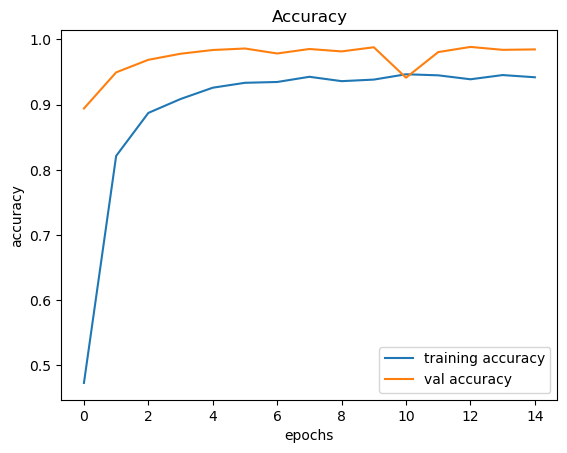

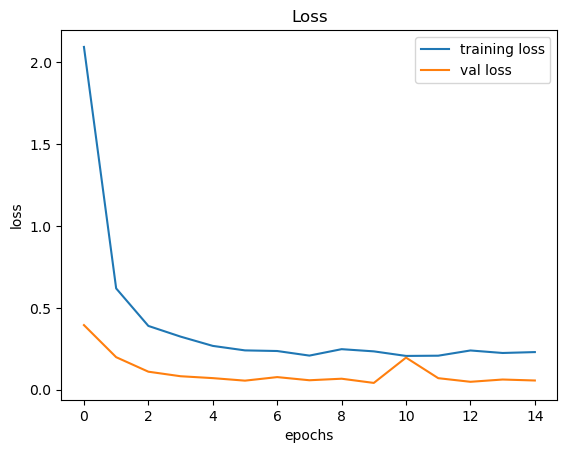

In [38]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [39]:
from sklearn.metrics import accuracy_score
import pandas as pd

In [35]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
pred = np.argmax(model.predict(X_test),axis=-1)

395/395 [==============================] - 1s 3ms/step


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

0.9523357086302454

In [41]:
model.save('traffic_classifier.h5')

In [44]:
%pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [1]:
!tensorflowjs_converter --input_format=keras "traffic_classifier.h5" ./jsmodel

2023-04-14 10:02:36.996879: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-14 10:02:36.997116: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
